In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.stats import f_oneway
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
df = pd.read_csv("https://raw.githubusercontent.com/ajkam/schulich_data_science/main/Final_Prep/anime.csv")


In [38]:
pd.set_option('display.max_columns', None)
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [40]:
df.describe()

,MAL_ID,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [41]:
df.isna().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

In [42]:
# sns.pairplot(df)


In [43]:
print(df['Score'].unique())


['8.78' '8.39' '8.24' '7.27' '6.98' '7.95' '8.06' '7.59' '8.15' '8.76'
 '7.91' '8.52' '7.9' '6.38' '7.94' '7.42' '7.76' '7.32' '7.51' '8.32'
 '7.45' '8.51' '8.49' '8.29' '8.73' '8.31' '7.56' '8.17' '7.35' '6.31'
 '7.26' '7.14' '7.1' '6.53' '5.91' '7.05' '7.43' '7.66' '7.2' '6.77'
 '6.62' '7.44' '7.65' '7.98' '7.58' '7.38' '6.35' '8.07' '7.96' '7.3'
 '7.99' '7.09' '7.78' '8.03' '6.79' '7.92' '6.66' '7.68' '6.67' '6.76'
 '7.72' '7.79' '7.22' '7.7' '7.82' '7.46' '7.31' '7.48' '7.39' '7.23'
 '6.46' '7.29' '6.81' '7.63' '6.83' '4.95' '7.93' '6.97' '6.85' '6.56'
 '7.69' '7.64' '6.86' '6.49' '6.91' '6.96' '7.41' '7.61' '6.21' '8.11'
 '8.42' '8.33' '8.21' '6.14' '6.87' '7.11' '7.24' '7.12' '7.28' '6.59'
 '7.34' '6.34' '7.33' '6.94' '6.48' '8.72' '8.53' '6.93' '6.63' '6.19'
 '7.55' '7.18' '6.69' '7.21' '6.37' '8.12' '7.89' '6.11' '7.25' '6.8'
 '7.17' '6.88' '6.55' '8.83' '6.75' '8.5' '7.16' '7.4' '7.67' '6.26'
 '6.02' '6.15' '5.94' '6.28' '7.52' '5.76' '6.65' '6.68' '8.0' '6.92'
 '7.02' '6.18' 

In [44]:
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')
df['Episodes'] = pd.to_numeric(df['Episodes'], errors='coerce')
df['Licensors'] = df['Licensors'].astype(str)
df['Duration'] = df['Duration'].str.extract(r'(\d+)').astype(float)
df['Studios'] = df['Studios'].astype(str)
df['Source'] = df['Source'].astype(str)
df['Ranked'] = pd.to_numeric(df['Ranked'], errors='coerce')
        
 
         


In [45]:
df.drop_duplicates(inplace=True)

In [46]:
df.describe()

,MAL_ID,Score,Episodes,Duration,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,12421.000000,17046.000000,17007.000000,15800.00000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,6.509999,11.525519,16.861939,7895.21000,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,0.886717,47.348640,13.349238,4557.31849,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,1.850000,1.000000,1.000000,0.00000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,5.930000,1.000000,3.000000,3944.00000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,6.520000,2.000000,19.000000,7896.00000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,7.140000,12.000000,25.000000,11845.25000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,9.190000,3057.000000,59.000000,15780.00000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


In [47]:
df.isna().sum()

MAL_ID              0
Name                0
Score            5141
Genres              0
English name        0
Japanese name       0
Type                0
Episodes          516
Aired               0
Premiered           0
Producers           0
Licensors           0
Studios             0
Source              0
Duration          555
Rating              0
Ranked           1762
Popularity          0
Members             0
Favorites           0
Watching            0
Completed           0
On-Hold             0
Dropped             0
Plan to Watch       0
Score-10            0
Score-9             0
Score-8             0
Score-7             0
Score-6             0
Score-5             0
Score-4             0
Score-3             0
Score-2             0
Score-1             0
dtype: int64

In [48]:
missing_proportion = df.isna().sum() / len(df)
print(missing_proportion)

MAL_ID           0.000000
Name             0.000000
Score            0.292734
Genres           0.000000
English name     0.000000
Japanese name    0.000000
Type             0.000000
Episodes         0.029382
Aired            0.000000
Premiered        0.000000
Producers        0.000000
Licensors        0.000000
Studios          0.000000
Source           0.000000
Duration         0.031602
Rating           0.000000
Ranked           0.100330
Popularity       0.000000
Members          0.000000
Favorites        0.000000
Watching         0.000000
Completed        0.000000
On-Hold          0.000000
Dropped          0.000000
Plan to Watch    0.000000
Score-10         0.000000
Score-9          0.000000
Score-8          0.000000
Score-7          0.000000
Score-6          0.000000
Score-5          0.000000
Score-4          0.000000
Score-3          0.000000
Score-2          0.000000
Score-1          0.000000
dtype: float64


In [49]:
df=df.dropna(subset=['Score'])


In [50]:
episodes_mean = df['Episodes'].mean()

In [51]:
df['Episodes'].fillna(value=episodes_mean, inplace= True)

In [52]:
duration_mean = df['Duration'].mean()

In [53]:
df['Duration'].fillna(value=duration_mean, inplace= True)

In [54]:
df=df.dropna(subset=['Ranked'])


In [55]:
df.isna().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11063 entries, 0 to 17552
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         11063 non-null  int64  
 1   Name           11063 non-null  object 
 2   Score          11063 non-null  float64
 3   Genres         11063 non-null  object 
 4   English name   11063 non-null  object 
 5   Japanese name  11063 non-null  object 
 6   Type           11063 non-null  object 
 7   Episodes       11063 non-null  float64
 8   Aired          11063 non-null  object 
 9   Premiered      11063 non-null  object 
 10  Producers      11063 non-null  object 
 11  Licensors      11063 non-null  object 
 12  Studios        11063 non-null  object 
 13  Source         11063 non-null  object 
 14  Duration       11063 non-null  float64
 15  Rating         11063 non-null  object 
 16  Ranked         11063 non-null  float64
 17  Popularity     11063 non-null  int64  
 18  Member

In [57]:
df.describe()

,MAL_ID,Score,Episodes,Duration,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,11063.000000,1.106300e+04,11063.000000,11063.000000,1.106300e+04,11063.000000,11063.000000,11063.000000
mean,17831.186116,6.554991,12.426592,17.170622,5531.140830,6336.741933,5.379024e+04,719.313477,3472.293501,3.462795e+04,1484.158547,1825.245865,12380.590979
std,14559.552224,0.900927,45.028060,13.170467,3192.947346,3991.017006,1.545691e+05,5101.394386,17578.263016,1.127784e+05,5315.462418,5875.374065,28692.010036
min,1.000000,1.850000,1.000000,1.000000,1.000000,1.000000,1.720000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000,12.000000
25%,3583.500000,5.980000,1.000000,4.000000,2766.500000,2818.500000,1.401500e+03,1.000000,47.000000,5.960000e+02,29.000000,56.000000,490.500000
50%,13195.000000,6.570000,2.000000,23.000000,5529.000000,6042.000000,5.931000e+03,9.000000,200.000000,2.953000e+03,124.000000,138.000000,2040.000000
75%,32904.000000,7.200000,12.000000,24.000000,8296.500000,9727.500000,3.307200e+04,83.000000,1194.000000,1.887250e+04,679.000000,687.000000,9193.500000
max,48456.000000,9.190000,1818.000000,59.000000,11074.000000,15374.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


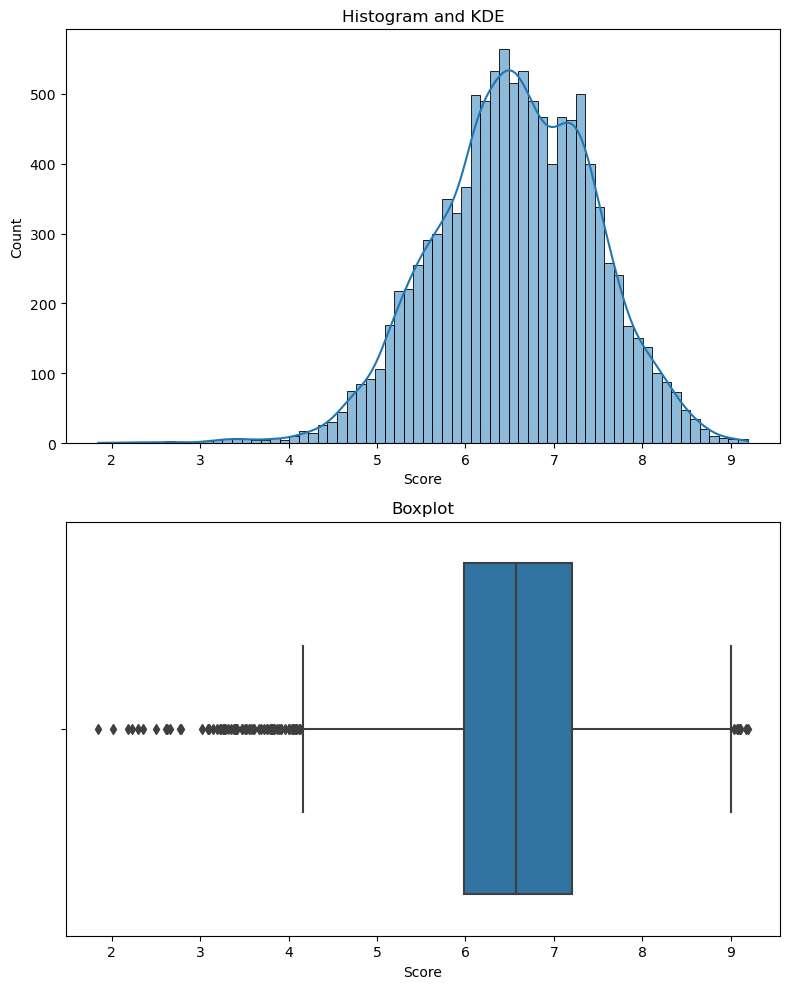

In [58]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot histogram in the first subplot
sns.histplot(data=df, x='Score', ax=axes[0], kde=True)

# Plot boxplot in the second subplot
sns.boxplot(data=df, x='Score', ax=axes[1])

# Set titles for subplots
axes[0].set_title('Histogram and KDE')
axes[1].set_title('Boxplot')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()








In [59]:
print(scipy.stats.skew(df['Score']))
print(scipy.stats.kurtosis(df['Score'], fisher=True))


-0.28779179797473975
0.41070274994830624


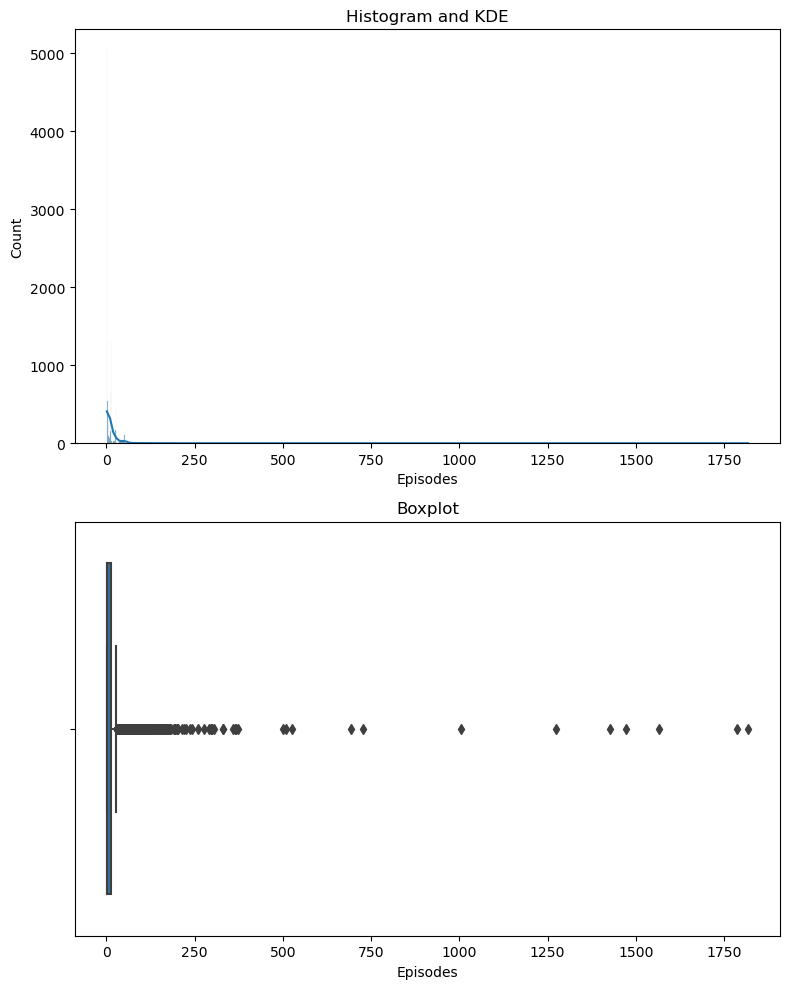

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot histogram in the first subplot
sns.histplot(data=df, x='Episodes', ax=axes[0], kde=True)

# Plot boxplot in the second subplot
sns.boxplot(data=df, x='Episodes', ax=axes[1])

# Set titles for subplots
axes[0].set_title('Histogram and KDE')
axes[1].set_title('Boxplot')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


In [61]:
print(scipy.stats.skew(df['Episodes']))
print(scipy.stats.kurtosis(df['Episodes'], fisher=True))

25.642027644920216
859.8651785184306


In [62]:
df.drop(df[df['Episodes']>750].index, axis=0, inplace=True)


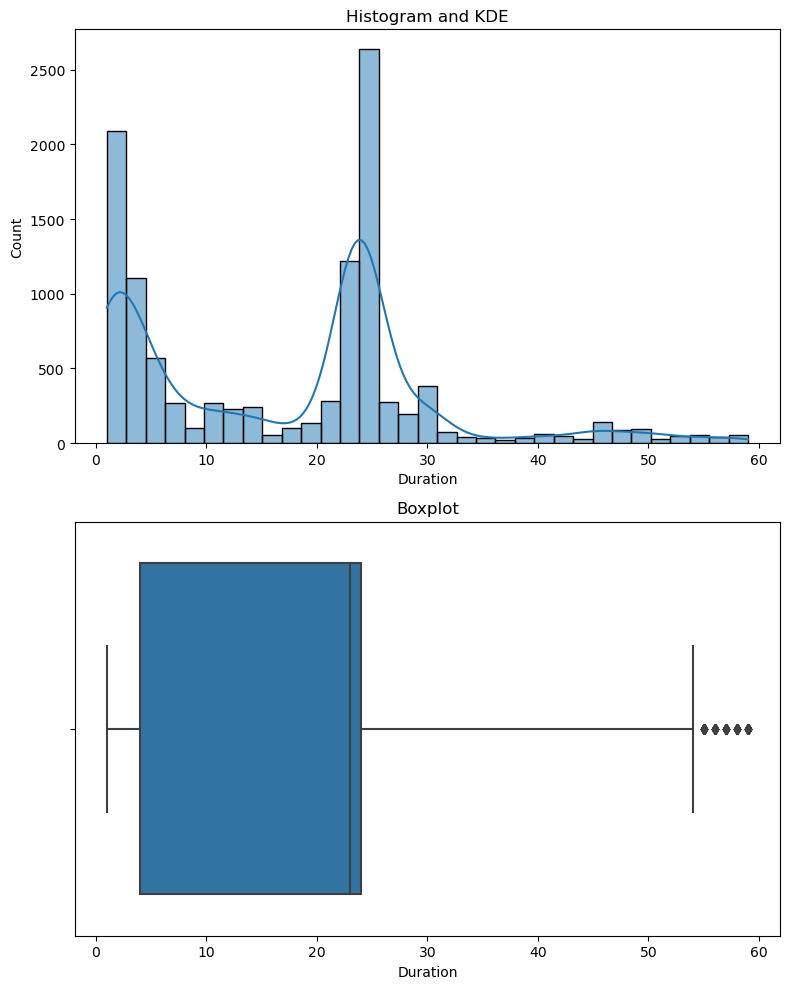

In [63]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot histogram in the first subplot
sns.histplot(data=df, x='Duration', ax=axes[0], kde=True)

# Plot boxplot in the second subplot
sns.boxplot(data=df, x='Duration', ax=axes[1])

# Set titles for subplots
axes[0].set_title('Histogram and KDE')
axes[1].set_title('Boxplot')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [64]:
print(scipy.stats.skew(df['Duration']))
print(scipy.stats.kurtosis(df['Duration'], fisher=True))

0.5529532588893835
0.05666190925845083


In [65]:
df[df['Duration']>58]

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
784,868,Slayers Great,7.34,"Adventure, Comedy, Fantasy, Magic, Shounen",Slayers Movie 3,スレーヤーズぐれえと,Movie,1.0,"Aug 2, 1997",Unknown,"TV Tokyo, SoftX",ADV Films,J.C.Staff,Light novel,59.0,PG-13 - Teens 13 or older,2177.0,3935,16932,12,217,12714,187,102,3712,647.0,1051.0,2161.0,2743.0,1243.0,534.0,137.0,50.0,9.0,16.0
1001,1101,Tenchi Muyou! Manatsu no Eve,7.14,"Action, Comedy, Sci-Fi, Shounen, Space",Tenchi the Movie 2:Daughter of Darkness,天地無用！真夏のイヴ,Movie,1.0,"Aug 2, 1997",Unknown,"Geneon Universal Entertainment, Genco, Pioneer...","Funimation, Geneon Entertainment USA",AIC,Unknown,59.0,R+ - Mild Nudity,3019.0,4321,13699,15,224,10603,146,97,2629,497.0,759.0,1620.0,2282.0,1155.0,567.0,202.0,54.0,35.0,15.0
1634,1795,Dirty Pair: Bouryaku no 005-bin,6.79,"Action, Sci-Fi, Adventure, Comedy, Police",Original Dirty Pair:Flight 005 Conspiracy,ダーティペア 謀略の００５便,OVA,1.0,"Jan 25, 1990",Unknown,Unknown,"ADV Films, Nozomi Entertainment",Sunrise,Light novel,59.0,PG-13 - Teens 13 or older,4485.0,7479,3439,4,95,2073,59,39,1173,59.0,93.0,265.0,502.0,306.0,134.0,55.0,14.0,8.0,4.0
1920,2100,Silent Möbius 2,6.29,"Sci-Fi, Adventure, Demons, Fantasy, Seinen",Unknown,サイレントメビウス2,Movie,1.0,"Jul 18, 1992",Unknown,"Kadokawa Shoten, Victor Entertainment, Imagica...",Bandai Entertainment,AIC,Manga,59.0,PG-13 - Teens 13 or older,6938.0,8158,2618,2,79,1398,59,49,1033,28.0,40.0,118.0,236.0,262.0,152.0,71.0,21.0,11.0,2.0
2407,2621,Natsu e no Tobira,6.08,"Drama, Romance, Shoujo, Shounen Ai",Unknown,夏への扉,Movie,1.0,"Mar 20, 1981",Unknown,Unknown,Unknown,"Madhouse, Toei Animation",Manga,59.0,PG-13 - Teens 13 or older,7870.0,6710,4578,13,111,2125,60,106,2176,54.0,81.0,220.0,400.0,335.0,230.0,137.0,61.0,50.0,59.0
2748,3014,Ginga Eiyuu Densetsu: Waga Yuku wa Hoshi no Ta...,7.95,"Action, Military, Sci-Fi, Space",Unknown,銀河英雄伝説:わが征くは星の大海,Movie,1.0,"Feb 6, 1988",Unknown,Unknown,Sentai Filmworks,"Artland, Madhouse",Novel,59.0,PG-13 - Teens 13 or older,596.0,2970,30212,45,507,21734,264,162,7545,1895.0,3623.0,6236.0,3867.0,1009.0,371.0,93.0,100.0,24.0,183.0
2749,3015,Ginga Eiyuu Densetsu Gaiden: Ougon no Tsubasa,6.28,"Action, Military, Sci-Fi, Space, Drama",Unknown,銀河英雄伝説外伝 黄金の翼,Movie,1.0,"Dec 12, 1992",Unknown,"Kitty Films, Magic Capsule, Tokuma Shoten, Tok...",Unknown,Magic Bus,Novel,59.0,PG-13 - Teens 13 or older,6976.0,4579,11810,8,226,6508,188,145,4743,236.0,303.0,683.0,1265.0,1110.0,739.0,446.0,210.0,90.0,92.0
2767,3037,GS Mikami: Gokuraku Daisakusen!!,6.59,"Comedy, Fantasy",Ghost Sweeper Mikami Movie,GS美神 極楽大作戦!!,Movie,1.0,"Aug 20, 1994",Unknown,Unknown,Manga Entertainment,Toei Animation,Manga,59.0,PG-13 - Teens 13 or older,5444.0,8405,2379,1,77,1274,58,53,917,44.0,67.0,143.0,251.0,228.0,124.0,33.0,19.0,4.0,7.0
3177,3625,Battle Royal High School,5.57,"Action, Horror, Super Power, Demons, Supernatu...",Battle Royal High School,真魔神伝 バトルロイヤルハイスクール,OVA,1.0,"Dec 10, 1987",Unknown,"Tokuma Shoten, D.A.S.T.",AnimEigo,AIC,Manga,59.0,R+ - Mild Nudity,9492.0,6093,5817,17,130,3124,66,98,2399,112.0,69.0,193.0,396.0,495.0,401.0,320.0,191.0,132.0,66.0
3266,3762,The Borgman: Last Battle,6.05,"Action, Sci-Fi, Demons",Sonic Soldier Borgman:Last Battle,THE·BORGMAN LAST BATTLE (ザ・ボーグマン ラストバトル),OVA,1.0,"Sep 16, 1989",Unknown,Unknown,Unknown,Production Reed,Other,59.0,PG-13 - Teens 13 or older,8008.0,10943,804,1,36,337,23,34,374,9.0,10.0,20.0,54.0,72.0,50.0,18.0,12.0,3.0,4.0


In [66]:
df.drop(df[df['Duration']>58].index, axis=0, inplace=True)


In [67]:
df.describe()

,MAL_ID,Score,Episodes,Duration,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,11026.000000,11026.000000,11026.000000,11026.000000,11026.000000,11026.000000,1.102600e+04,11026.000000,11026.000000,1.102600e+04,11026.000000,11026.000000,11026.000000
mean,17840.675404,6.554897,11.526971,17.062180,5531.316252,6336.003084,5.387533e+04,721.430437,3481.992926,3.468072e+04,1487.984310,1830.281244,12394.356974
std,14563.475316,0.900912,24.991470,13.007471,3192.068681,3991.091026,1.547999e+05,5109.801288,17606.870506,1.129476e+05,5323.833942,5884.287357,28730.976645
min,1.000000,1.850000,1.000000,1.000000,1.000000,1.000000,1.720000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000,12.000000
25%,3581.250000,5.980000,1.000000,4.000000,2770.500000,2819.000000,1.405250e+03,1.000000,47.000000,5.972500e+02,29.000000,56.000000,490.250000
50%,13209.000000,6.570000,2.000000,23.000000,5529.000000,6040.000000,5.937500e+03,9.000000,200.000000,2.955500e+03,124.000000,138.000000,2040.000000
75%,32926.250000,7.200000,12.000000,24.000000,8294.750000,9721.750000,3.306575e+04,83.000000,1195.000000,1.886075e+04,680.000000,693.750000,9188.750000
max,48456.000000,9.190000,726.000000,58.000000,11074.000000,15374.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


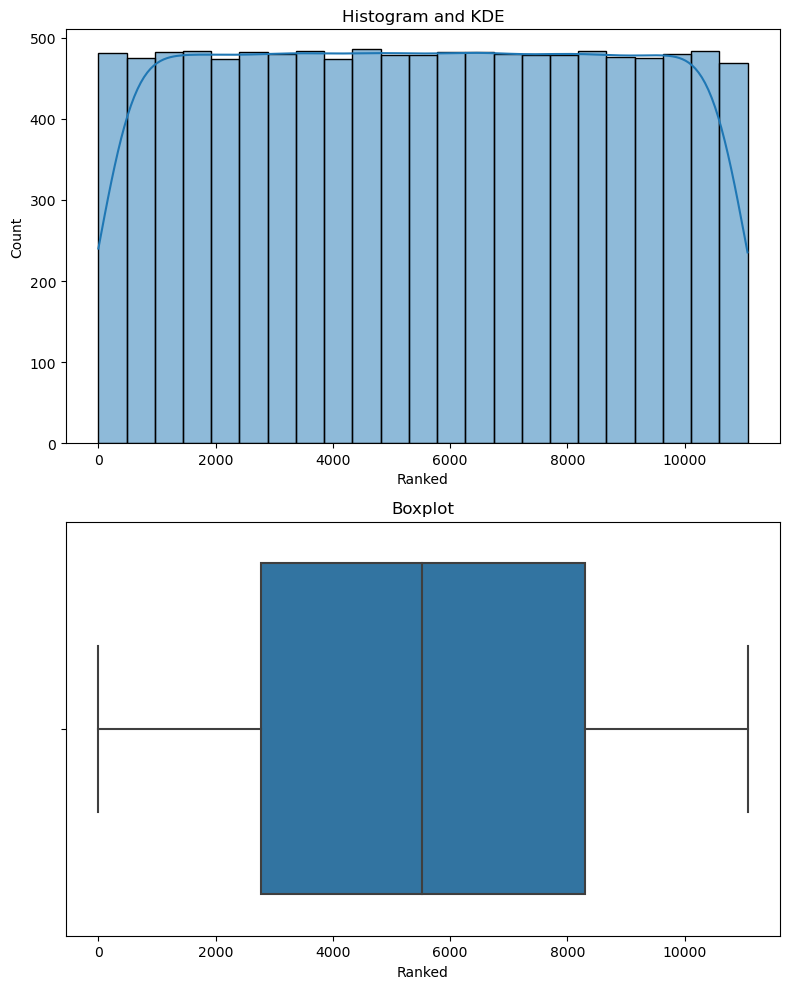

In [68]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

# Plot histogram in the first subplot
sns.histplot(data=df, x='Ranked', ax=axes[0], kde=True)

# Plot boxplot in the second subplot
sns.boxplot(data=df, x='Ranked', ax=axes[1])

# Set titles for subplots
axes[0].set_title('Histogram and KDE')
axes[1].set_title('Boxplot')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

In [69]:
print(scipy.stats.skew(df['Ranked']))
print(scipy.stats.kurtosis(df['Ranked'], fisher=True))

0.0003022298721481325
-1.1983193781321442


In [70]:
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1.0,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1.0,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23.0,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [71]:
df = df.drop(columns=['English name'])
df = df.drop(columns=['Japanese name'])



In [72]:
df.head()

,MAL_ID,Name,Score,Genres,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24.0,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1.0,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1.0,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24.0,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26.0,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25.0,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52.0,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23.0,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
